# Analysis of gamma distribution and how well normal distribution aproximate it

For NEES test distribution of NEES mean needs to be evaluated. Based on [wiki](https://en.wikipedia.org/wiki/Chi-squared_distribution) Chci square mean has Gamma distribution, which for big N can be aproximated by normal distribution

In [1]:
import numpy as np
from scipy.stats import gamma, norm, chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_min = 0
x_max = 6
k = 1

x = np.linspace(x_min, x_max, 1000)

### Several examples of gamma distribution for low samples

In [3]:
N = np.linspace(1, 10, 10)

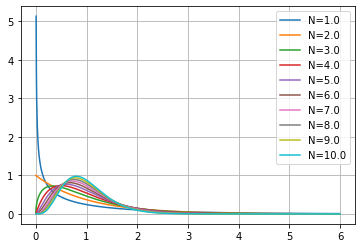

In [4]:
plt.figure
plt.grid()

for n in N:
    alpha = n*k/2
    theta = 2/n
    y_pdf = gamma.pdf(x, a=alpha, scale=theta)
    plt.plot(x, y_pdf, label=f'N={n}')
    
plt.legend()
    

### Check if Gamma distribution describes well distribution of Chi-square mean 

(0, 6)

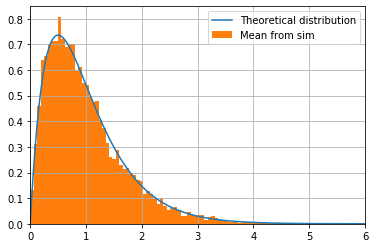

In [5]:
N = 4;
N_sim = 10000
chi2_mean = np.zeros(N_sim)
for i, _ in enumerate(chi2_mean):
    chi2_x = chi2.rvs(k, size=N)
    chi2_mean[i] = chi2_x.mean()


alpha = N*k/2
theta = 2/N
y_pdf = gamma.pdf(x, a=alpha, scale=theta)

plt.figure
plt.grid()
plt.plot(x, y_pdf, label='Theoretical distribution')
plt.hist(chi2_mean, bins=100, density=True, label='Mean from sim')
plt.legend()
plt.xlim([x_min, x_max])


### Several examples of gamma distribution for big samples

In [6]:
N = np.linspace(100, 200, 6)

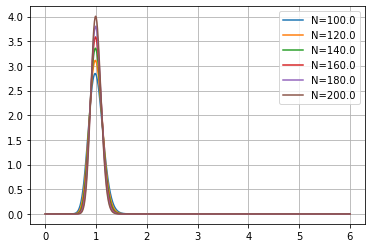

In [7]:
plt.figure
plt.grid()

for n in N:
    alpha = n*k/2
    theta = 2/n
    y_pdf = gamma.pdf(x, a=alpha, scale=theta)
    plt.plot(x, y_pdf, label=f'N={n}')
    
plt.legend()

### Comparison of aproximation by normal distribution

In [8]:
N = np.array([5, 10, 30, 100, 1000])

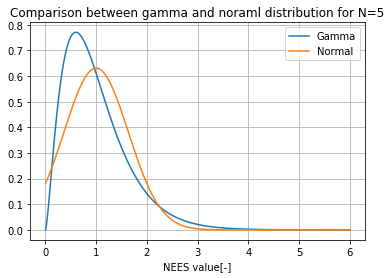

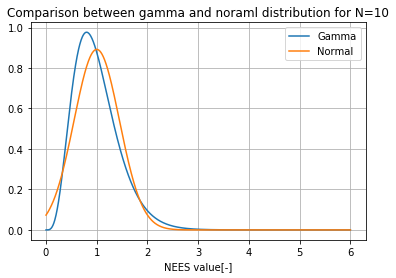

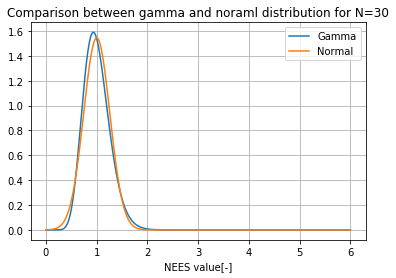

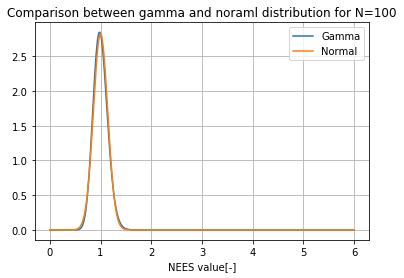

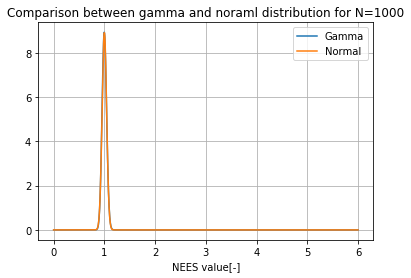

In [9]:
for n in N:
    plt.figure()
    plt.grid()
    alpha = n*k/2
    theta = 2/n
    mu = k
    sigma = np.sqrt(2*k/n)
    plt.title(f'Comparison between gamma and noraml distribution for N={n}')
    plt.plot(x, gamma.pdf(x, a=alpha, scale=theta), label='Gamma')
    plt.plot(x, norm.pdf(x, mu, sigma), label='Normal')
    plt.xlabel('NEES value[-]')
    plt.legend()
    
    


### Analysis of differences between cumulative distribution functions

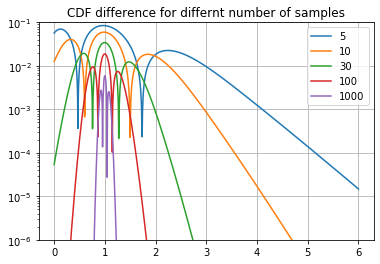

In [10]:
plt.figure()
plt.grid()
for n in N:

    alpha = n*k/2
    theta = 2/n
    mu = k
    sigma = np.sqrt(2*k/n)
    
    diff = gamma.cdf(x, a=alpha, scale=theta) - norm.cdf(x, mu, sigma)
    plt.semilogy(x, abs(diff), label=f'{n}')
    plt.ylim([1e-6, 1e-1])

plt.title(f'CDF difference for differnt number of samples')
plt.legend()   

#### With taking into account Anderson-Darling weight

c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbox\radardetectionsevaluation\.venv_pe\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbox\radardetectionsevaluation\.venv_pe\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbox\radardetectionsevaluation\.venv_pe\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbox\radardetectionsevaluation\.venv_pe\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbo

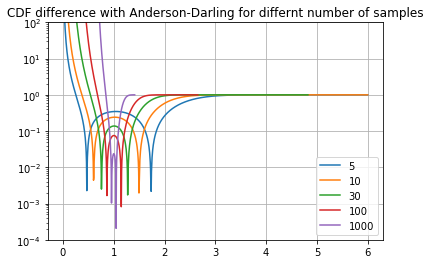

In [11]:
plt.figure()
plt.grid()
for n in N:

    alpha = n*k/2
    theta = 2/n
    mu = k
    sigma = np.sqrt(2*k/n)
    cdf_gamma = gamma.cdf(x, a=alpha, scale=theta) 
    diff = cdf_gamma - norm.cdf(x, mu, sigma)
    a2_weight = 1/(cdf_gamma * (1-cdf_gamma))
    diff_a2 = a2_weight * diff
    plt.semilogy(x, abs(diff_a2), label=f'{n}')
    plt.ylim([1e-4, 1e2])

plt.title(f'CDF difference with Anderson-Darling for differnt number of samples')
plt.legend()  

### Check inverse cumulative distribution

In [12]:
pp = np.linspace(0,1,10000)
pp = pp[1:-1] # remove zero and 1

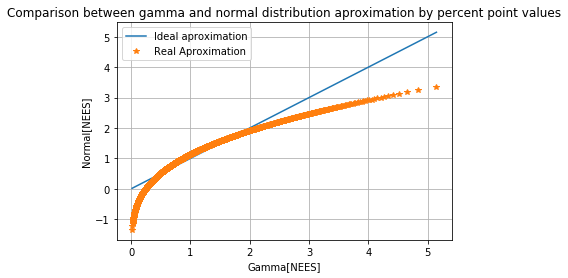

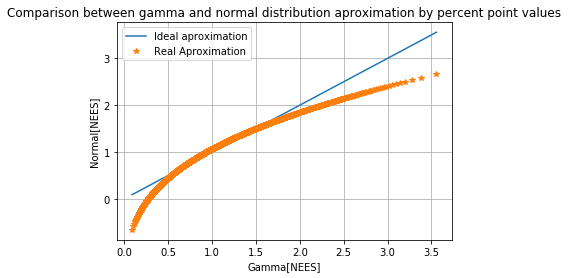

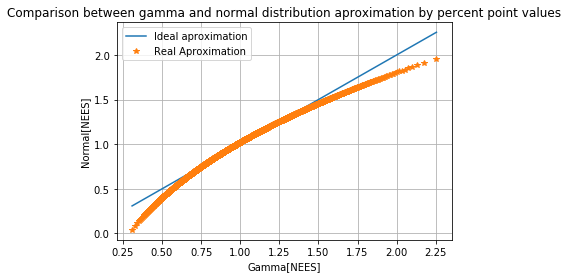

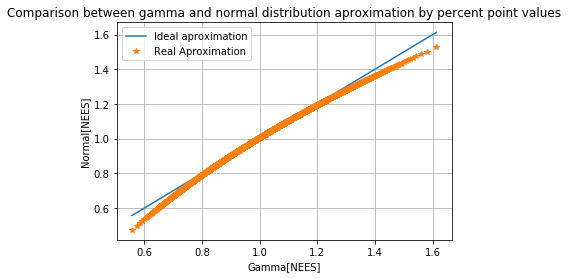

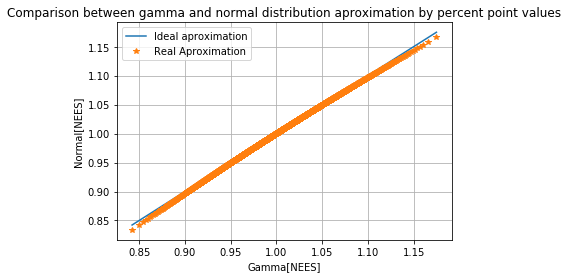

In [13]:
for n in N:
    plt.figure()
    plt.grid()
    alpha = n*k/2
    theta = 2/n
    mu = k
    sigma = np.sqrt(2*k/n)
    plt.title(f'Comparison between gamma and noraml percent point functions for N={n}')
    
    gamma_pp = gamma.ppf(pp, a=alpha, scale=theta)
    norm_pp =norm.ppf(pp, mu, sigma)
    ref_pp = gamma_pp
    plt.plot(gamma_pp, gamma_pp, label='Ideal aproximation')
    plt.plot(gamma_pp, norm_pp, '*', label='Real Aproximation')
    plt.title('Comparison between gamma and normal distribution aproximation by percent point values')
    plt.xlabel('Gamma[NEES]')
    plt.ylabel('Normal[NEES]')
    plt.legend()


#### Comparison for different number of samples and dimension of NEES for given percent point

In [14]:
PP = 0.9975
N = np.linspace(1, 1000, 1000)
K = np.array([1,2,3,4,6,10])

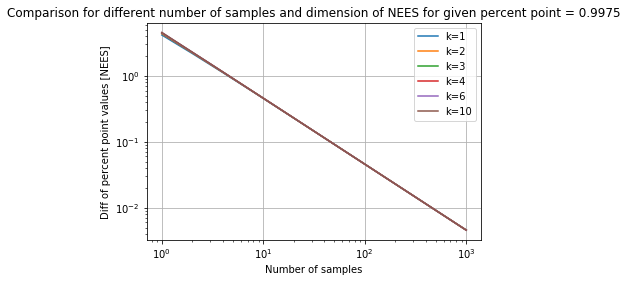

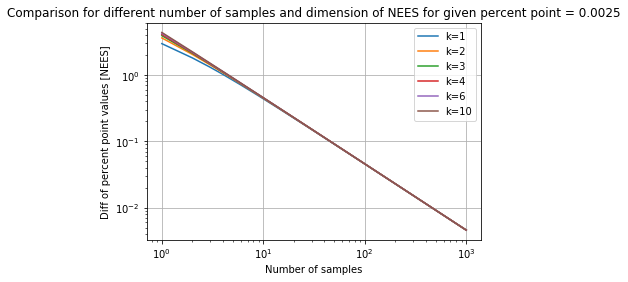

In [15]:
plt.figure()

for _, k_in in enumerate(K):
    gamma_pp = np.zeros_like(N)
    norm_pp = np.zeros_like(N)

    for i, n in enumerate(N):
        alpha = n*k_in/2
        theta = 2/n
        mu = k_in
        sigma = np.sqrt(2*k_in/n)
        gamma_pp[i] = gamma.ppf(PP, a=alpha, scale=theta)
        norm_pp[i] = norm.ppf(PP, mu, sigma)

    pp_diff = gamma_pp - norm_pp

    plt.loglog(N, pp_diff, label=f'k={k_in}')
    
plt.xlabel('Number of samples')
plt.ylabel('Diff of percent point values [NEES]')
plt.title(f'Comparison for different number of samples and dimension of NEES for given percent point = {PP:.4f}')
plt.grid()
plt.legend()

plt.figure()

for _, k_in in enumerate(K):
    gamma_pp = np.zeros_like(N)
    norm_pp = np.zeros_like(N)

    for i, n in enumerate(N):
        alpha = n*k_in/2
        theta = 2/n
        mu = k_in
        sigma = np.sqrt(2*k_in/n)
        gamma_pp[i] = gamma.ppf(1-PP, a=alpha, scale=theta)
        norm_pp[i] = norm.ppf(1-PP, mu, sigma)

    pp_diff = gamma_pp - norm_pp

    plt.loglog(N, pp_diff, label=f'k={k_in}')
    
plt.xlabel('Number of samples')
plt.ylabel('Diff of percent point values [NEES]')
plt.title(f'Comparison for different number of samples and dimension of NEES for given percent point = {1-PP:.4f}')
plt.grid()
plt.legend()


#### Comparison for different number of samples and percent point for given dimension of NEES

In [16]:
PP = np.array([0.001, 0.999, 0.005, 0.995, 0.05, 0.95])
N = np.linspace(1, 1000, 1000)
K = 3

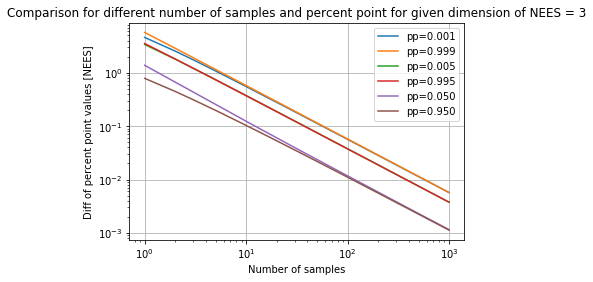

In [17]:
plt.figure()

for _, pp_in in enumerate(PP):
    gamma_pp = np.zeros_like(N)
    norm_pp = np.zeros_like(N)

    for i, n in enumerate(N):
        alpha = n*K/2
        theta = 2/n
        mu = K
        sigma = np.sqrt(2*K/n)
        gamma_pp[i] = gamma.ppf(pp_in, a=alpha, scale=theta)
        norm_pp[i] = norm.ppf(pp_in, mu, sigma)

    pp_diff = gamma_pp - norm_pp

    plt.loglog(N, pp_diff, label=f'pp={pp_in:.3f}')
    
plt.xlabel('Number of samples')
plt.ylabel('Diff of percent point values [NEES]')
plt.title(f'Comparison for different number of samples and percent point for given dimension of NEES = {K}')
plt.grid()
plt.legend()